**The Adult Census Income Prediction Project**

🔍 Project Overview
Using supervised learning techniques, I trained multiple machine learning models on labeled census data to classify income levels. To achieve the best performance, I tested various algorithms, optimized hyperparameters, and applied ensemble learning techniques.

📌 Dataset Source: UCI Machine Learning Repository
📌 Data Size: 48,842 instances, 14 features + target variable
📌 Target Variable: Income classification (≤50K or >50K per year)



SECTION A: IMPORT PACKAGES AND INITIATING TIMING OF THE WHOLE PROCESS

In [ ]:
import time

start_run = time.time()
import numpy as np
import pandas as pd
from IPython.display import Markdown, display
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# Load data from a csv file
data = pd.read_csv('adult.csv')
data_adult = pd.DataFrame(data)

 SECTION B: DATA PREPARATION AND PREPROCESSING BEGINS

In [ ]:
#Give headings to the columns
data_adult.columns = ['age','workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation',
             'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'country', 'salary']
data_adult.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


SECTION C: DATA CLEANING

In [ ]:
#Checking column types
print(data_adult.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  country         32560 non-null  object
 14  salary          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [ ]:
print(data_adult.shape)  # Print the shape of the DataFrame (number of rows, number of columns)
print(data_adult.describe())  # Statistical summary of the numerical columns of the dataset

(32560, 15)
                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32560.000000  3.256000e+04   32560.000000  32560.000000  32560.000000   
mean      38.581634  1.897818e+05      10.080590   1077.615172     87.306511   
std       13.640642  1.055498e+05       2.572709   7385.402999    402.966116   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178315e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783630e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370545e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32560.000000  
mean        40.437469  
std         12.347618  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


 SECTION D: CHECKING FOR MISSING VALUES IN DATA

In [ ]:
data_adult.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
country           0
salary            0
dtype: int64

PREPARING THE DATA COLUMN BY COLUMN

SECTION D:ANALYZING MARITAL STATUS COLUMN

In [ ]:
#CALLING OUT UNIQUE NAMES
data_adult['marital_status'].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

In [ ]:
# classifying various categories in marital_status columns as single or married
data_adult.replace(to_replace=data['marital_status'].unique(),\
           value = ['single','married','single','single','single','married','single'], inplace=True)
data_adult.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary
0,50,Self-emp-not-inc,83311,Bachelors,13,single,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,married,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,single,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,single,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,single,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


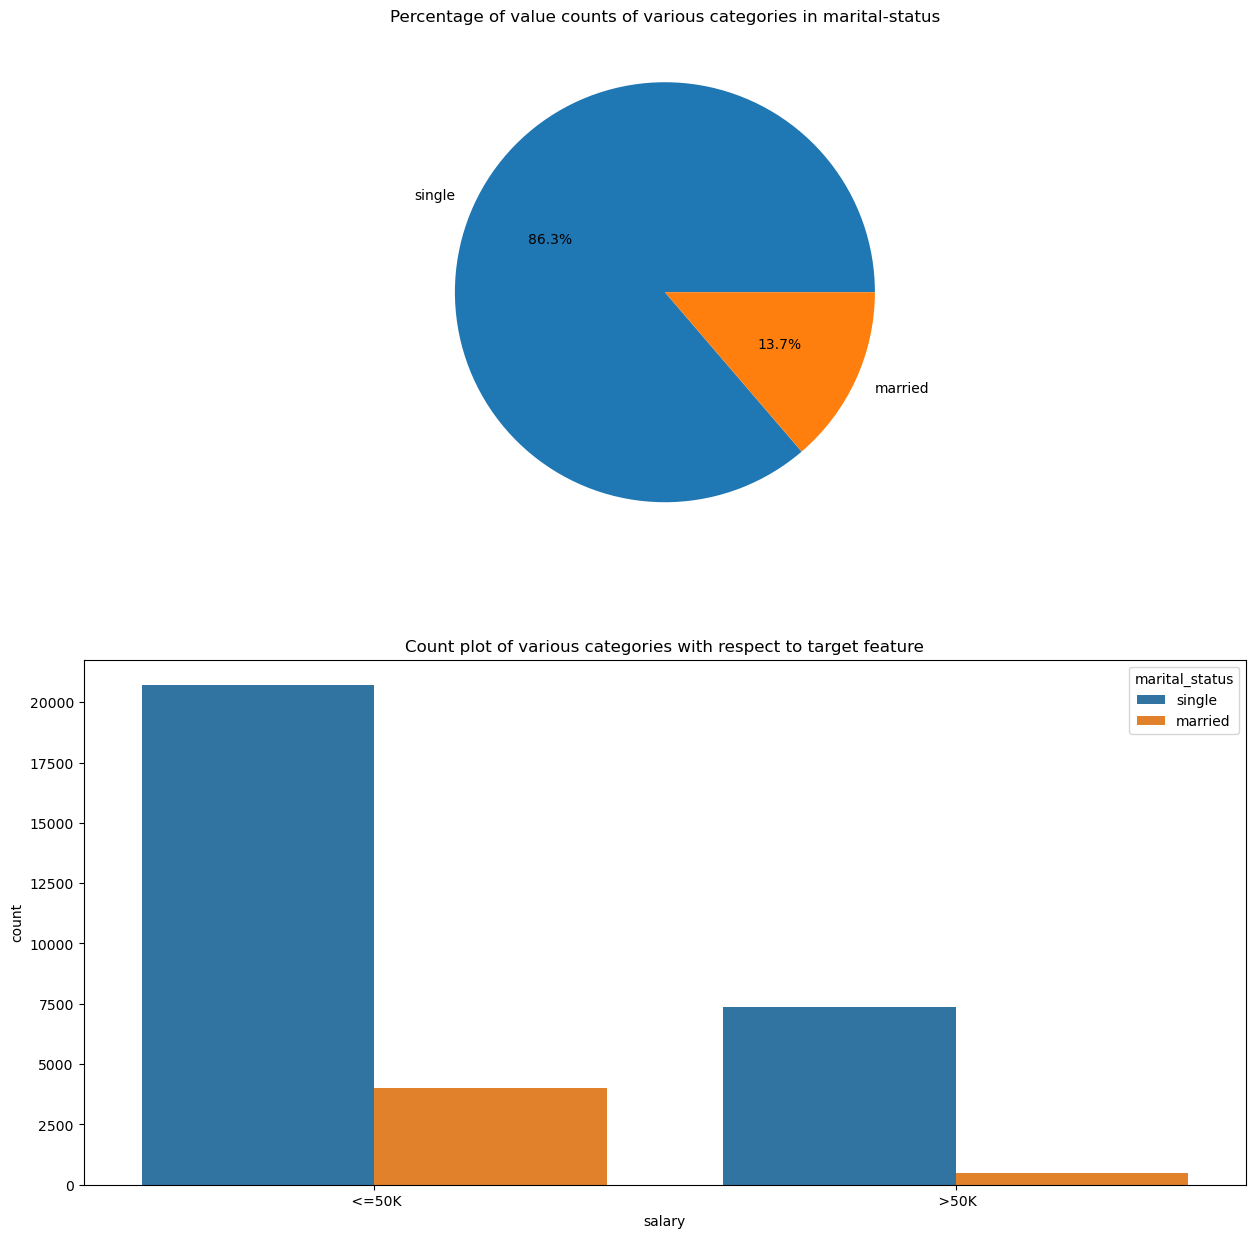

In [ ]:
#VISUALIZING THROUGH PIE CHART AND CATEGORIZED COUNTPLOT
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (15,15))
ax1 = axes[0]
ax2 = axes[1]
sns.countplot(x = 'salary', hue = 'marital_status', data = data_adult, ax = ax2)
ax2.set_title('Count plot of various categories with respect to target feature')
ax1.pie(x = data['marital_status'].value_counts(normalize=True), labels = data['marital_status'].value_counts().index,\
       autopct='%1.1f%%', radius = 1)
ax1.set_title('Percentage of value counts of various categories in marital-status')
plt.show()

In [ ]:
# encoding 0 for single and 1 for married
data_adult.replace(to_replace=['single', 'married'], value = [0,1], inplace = True)

SECTION E: ANALYZING CAPITAL GAIN AND LOSS COLUMNS

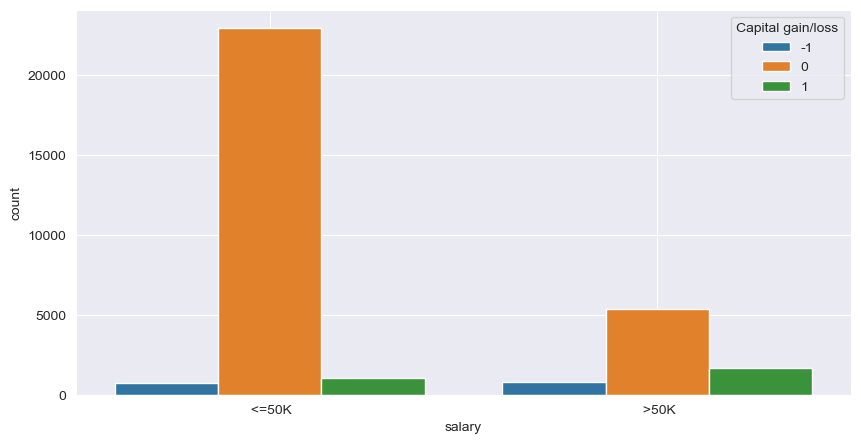

In [ ]:
# creating a new feature gain/loss to combine both capital_gain (>=0) and capital_loss (<=0) columns
#because both have zero (0) in common. It creates a continous same data from negative to positive.

gain_or_loss = np.zeros(len(data_adult))
gain_index = data_adult[data_adult['capital_gain'] != 0].index
loss_index = data_adult[data_adult['capital_loss'] != 0].index
for index in gain_index:
    gain_or_loss[index] = 1
for index in loss_index:
    gain_or_loss[index] = -1

data_adult['Capital gain/loss'] = gain_or_loss.astype(int)

# Analysing salary with respect to gain/loss column
plt.figure(figsize = (10,5))
sns.set_style(style = 'darkgrid')
sns.countplot(x = 'salary' , hue = 'Capital gain/loss', data = data_adult)
plt.grid(True)

Note: The significant difference between the number of those that have no difference in Capital loss and/or gain and others is too large.

SECTION F: ANALYZING SEX COLUMN

value counts in sex column in percentage
--------------------------------------------------


 Male      66.919533
 Female    33.080467
Name: sex, dtype: float64

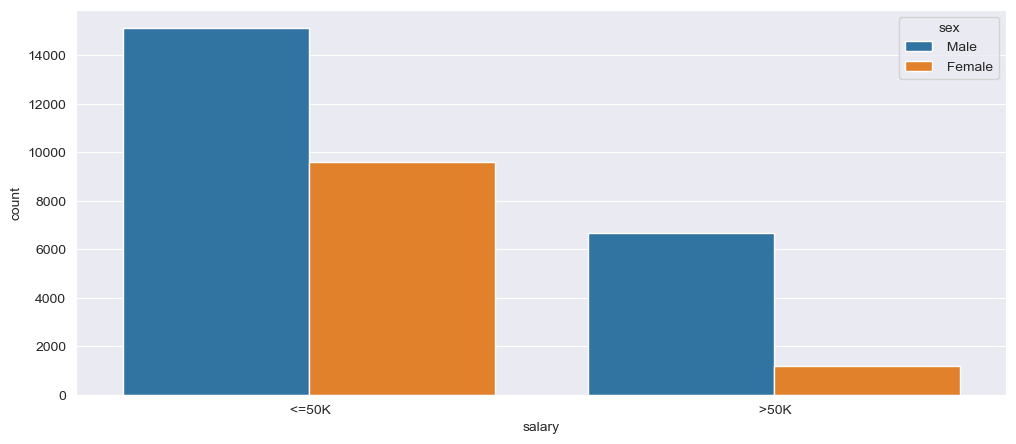

In [ ]:
plt.figure(figsize = (12,5))
sns.countplot(x = 'salary', hue = 'sex', data = data_adult)
print('value counts in sex column in percentage')
print('-'*50)
display(data_adult['sex'].value_counts(normalize=True)*100)

In [ ]:
# converting sex columns into binary values and visualizing to see its implementation

data_adult.replace(to_replace = [' Female', ' Male'], value = [0, 1], inplace = True)
data_adult.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary,Capital gain/loss
0,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,Husband,White,1,0,0,13,United-States,<=50K,0
1,38,Private,215646,HS-grad,9,1,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,<=50K,0
2,53,Private,234721,11th,7,0,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,<=50K,0
3,28,Private,338409,Bachelors,13,0,Prof-specialty,Wife,Black,0,0,0,40,Cuba,<=50K,0
4,37,Private,284582,Masters,14,0,Exec-managerial,Wife,White,0,0,0,40,United-States,<=50K,0


SECTION G: ANALYZING EDUCATION AND EDUCATION NUMBER COLUMNS

In [ ]:
# We observe that higher the degree of a person, higher is the education_num
# So we need not do any Label Encoding here, as ranks are already assigned in the desired format
# Creating a dataframe to know which rank belongs to which degree

data_education_labels = data_adult.groupby(by = 'education').describe()['education_num']['mean'].sort_values().reset_index()
data_education_labels

,education,mean
0,Preschool,1.0
1,1st-4th,2.0
2,5th-6th,3.0
3,7th-8th,4.0
4,9th,5.0
5,10th,6.0
6,11th,7.0
7,12th,8.0
8,HS-grad,9.0
9,Some-college,10.0


THE ABOVE SHOWS THAT THE education_num COLUMN CONSIST OF ORDINAL DATA

In [ ]:
# Naming education_num as education_rank. Because they (Education and Education_rank) seem same
#education will be dropped to remove the bias of one feature against another
#data will be visualized to see the implementation

data_adult.rename(columns = {'education_num': 'education_rank'}, inplace=True)
data_adult.head()

,age,workclass,fnlwgt,education,education_rank,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary,Capital gain/loss
0,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,Husband,White,1,0,0,13,United-States,<=50K,0
1,38,Private,215646,HS-grad,9,1,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,<=50K,0
2,53,Private,234721,11th,7,0,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,<=50K,0
3,28,Private,338409,Bachelors,13,0,Prof-specialty,Wife,Black,0,0,0,40,Cuba,<=50K,0
4,37,Private,284582,Masters,14,0,Exec-managerial,Wife,White,0,0,0,40,United-States,<=50K,0


<Axes: xlabel='salary', ylabel='education_rank'>

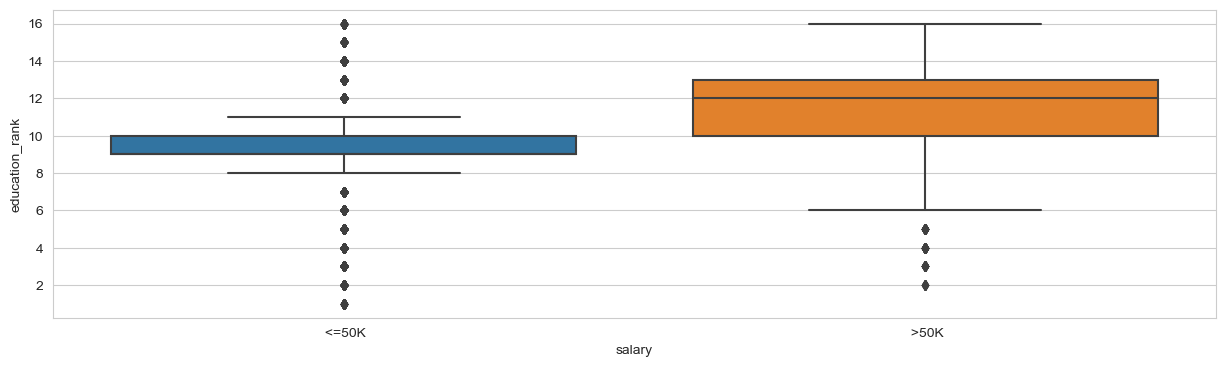

In [ ]:
plt.figure(figsize = (15,4))
sns.set_style(style='whitegrid')
sns.boxplot(x = 'salary', y = 'education_rank', data = data_adult)

As observed, there are less people earning more than $50,000 category, having the 6th to 10th grade education. This implies the higher your educational level the better your earnings.

SECTION H: ANALYZING WORKCLASS COLUMN

value counts in workclass column in percentage
--------------------------------------------------


 Private             75.343980
 Self-emp-not-inc     7.804054
 Local-gov            6.428133
 State-gov            3.983415
 Self-emp-inc         3.427518
 Federal-gov          2.948403
 Without-pay          0.042998
 Never-worked         0.021499
Name: workclass, dtype: float64

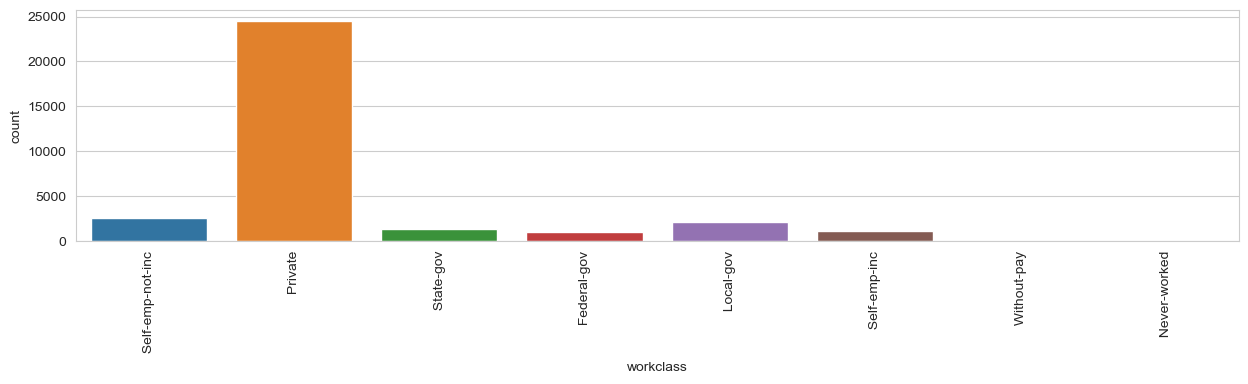

<Axes: xlabel='salary', ylabel='count'>

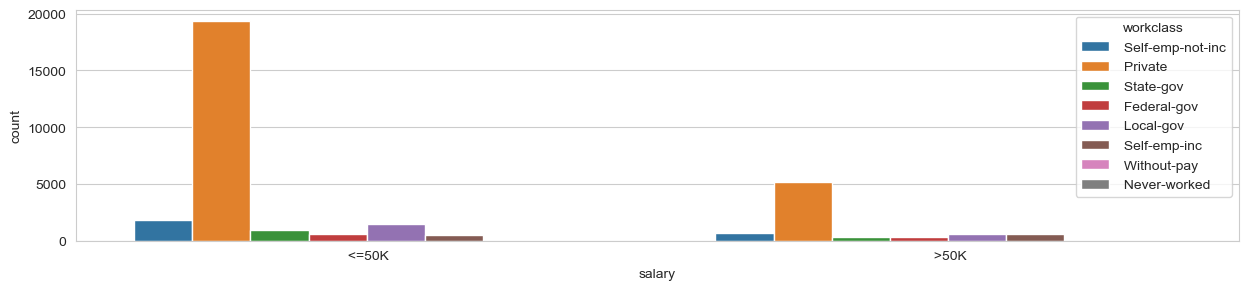

In [ ]:
# Using simple imputer to replace question marks denoting missing data in the workclass column
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=' ?', strategy = 'most_frequent')
workclass_imputed = imputer.fit_transform(data_adult[['workclass']])
data_adult['workclass'] = workclass_imputed
data_adult['workclass'].value_counts(normalize=True)*100

# Analyzing sex column
print('value counts in workclass column in percentage')
print('-'*50)
display(data_adult['workclass'].value_counts(normalize=True)*100)

plt.figure(figsize = (15,3))
plt.xticks(rotation = 90)
sns.countplot(x = 'workclass', data = data_adult)
plt.show()

plt.figure(figsize = (15,3))
sns.countplot(x = 'salary', hue = 'workclass', data = data_adult)

The percentage of workclass less than 8% should be added together to form others. Therefore there will only be 2
options, private and others

In [ ]:
# Naming values in workclass column as others where value count is less than 8% of total values

arr_others = data_adult['workclass'].value_counts(normalize=True)[data_adult['workclass'].value_counts(normalize=True)*100 < 8].index
data_adult.replace(to_replace = arr_others, value = ['others']*len(arr_others), inplace = True)

# Doing Label Encoding on workclass

import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the selected column
data_adult["workclass"] = label_encoder.fit_transform(data_adult["workclass"])

In [ ]:
#Visualizing to see the implementation
data_adult.head()

,age,workclass,fnlwgt,education,education_rank,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary,Capital gain/loss
0,50,1,83311,Bachelors,13,0,Exec-managerial,Husband,White,1,0,0,13,United-States,<=50K,0
1,38,0,215646,HS-grad,9,1,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,<=50K,0
2,53,0,234721,11th,7,0,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,<=50K,0
3,28,0,338409,Bachelors,13,0,Prof-specialty,Wife,Black,0,0,0,40,Cuba,<=50K,0
4,37,0,284582,Masters,14,0,Exec-managerial,Wife,White,0,0,0,40,United-States,<=50K,0


SECTION I: ANALYZING RACE COLUMN

value counts in workclass column in percentage
--------------------------------------------------


 White                 85.426904
 Black                  9.594595
 Asian-Pac-Islander     3.191032
 Amer-Indian-Eskimo     0.955160
 Other                  0.832310
Name: race, dtype: float64

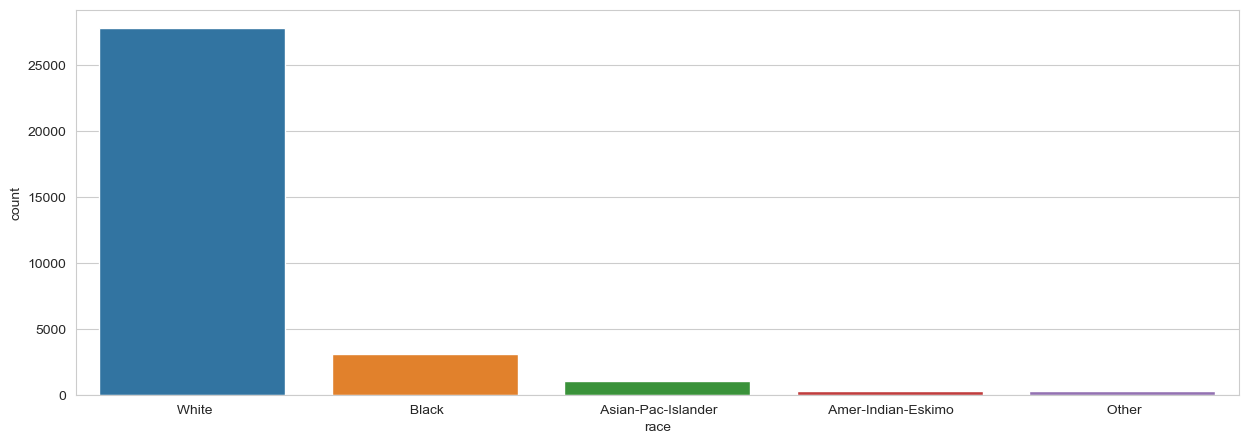

<Axes: xlabel='salary', ylabel='count'>

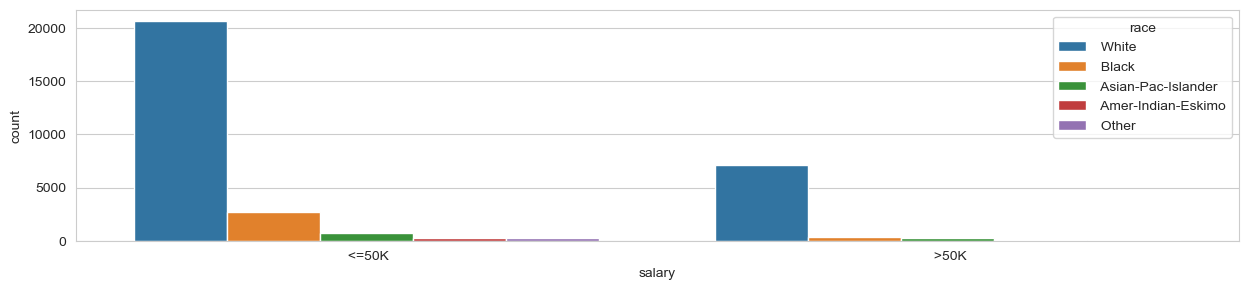

In [ ]:
# Using simple imputer to replace question marks denoting missing data in the race column
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=' ?', strategy = 'most_frequent')
workclass_imputed = imputer.fit_transform(data_adult[['race']])
data_adult['race'] = workclass_imputed
data_adult['race'].value_counts(normalize=True)*100

# Analyzing sex column
print('value counts in workclass column in percentage')
print('-'*50)
display(data_adult['race'].value_counts(normalize=True)*100)

# checking for values in race column
plt.figure(figsize = (15,5))
sns.countplot(x = 'race', data = data_adult)
plt.show()

plt.figure(figsize = (15,3))
sns.countplot(x = 'salary', hue = 'race', data = data_adult)

The percentage of race less than 10% will be added together to form others. Therefore there will only be 2
options, white and others

In [ ]:
# Naming values in race column as others where value count is less than 8% of total values

arr_others = data_adult['race'].value_counts(normalize=True)[data_adult['race'].value_counts(normalize=True)*100 < 10].index
data_adult.replace(to_replace = arr_others, value = ['others']*len(arr_others), inplace = True)

# Doing Label Encoding on workclass

import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the selected column
data_adult["race"] = label_encoder.fit_transform(data_adult["race"])

SECTION J: ANALYZING OCCUPATION COLUMN

In [ ]:
#calling out unique names
data_adult['occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

Occupation in percentage :


 Prof-specialty       18.375307
 Craft-repair         12.589066
 Exec-managerial      12.487715
 Adm-clerical         11.575553
 Sales                11.210074
 Other-service        10.119779
 Machine-op-inspct     6.148649
 Transport-moving      4.904791
 Handlers-cleaners     4.207617
 Farming-fishing       3.052826
 Tech-support          2.850123
 Protective-serv       1.993243
 Priv-house-serv       0.457617
 Armed-Forces          0.027641
Name: occupation, dtype: float64

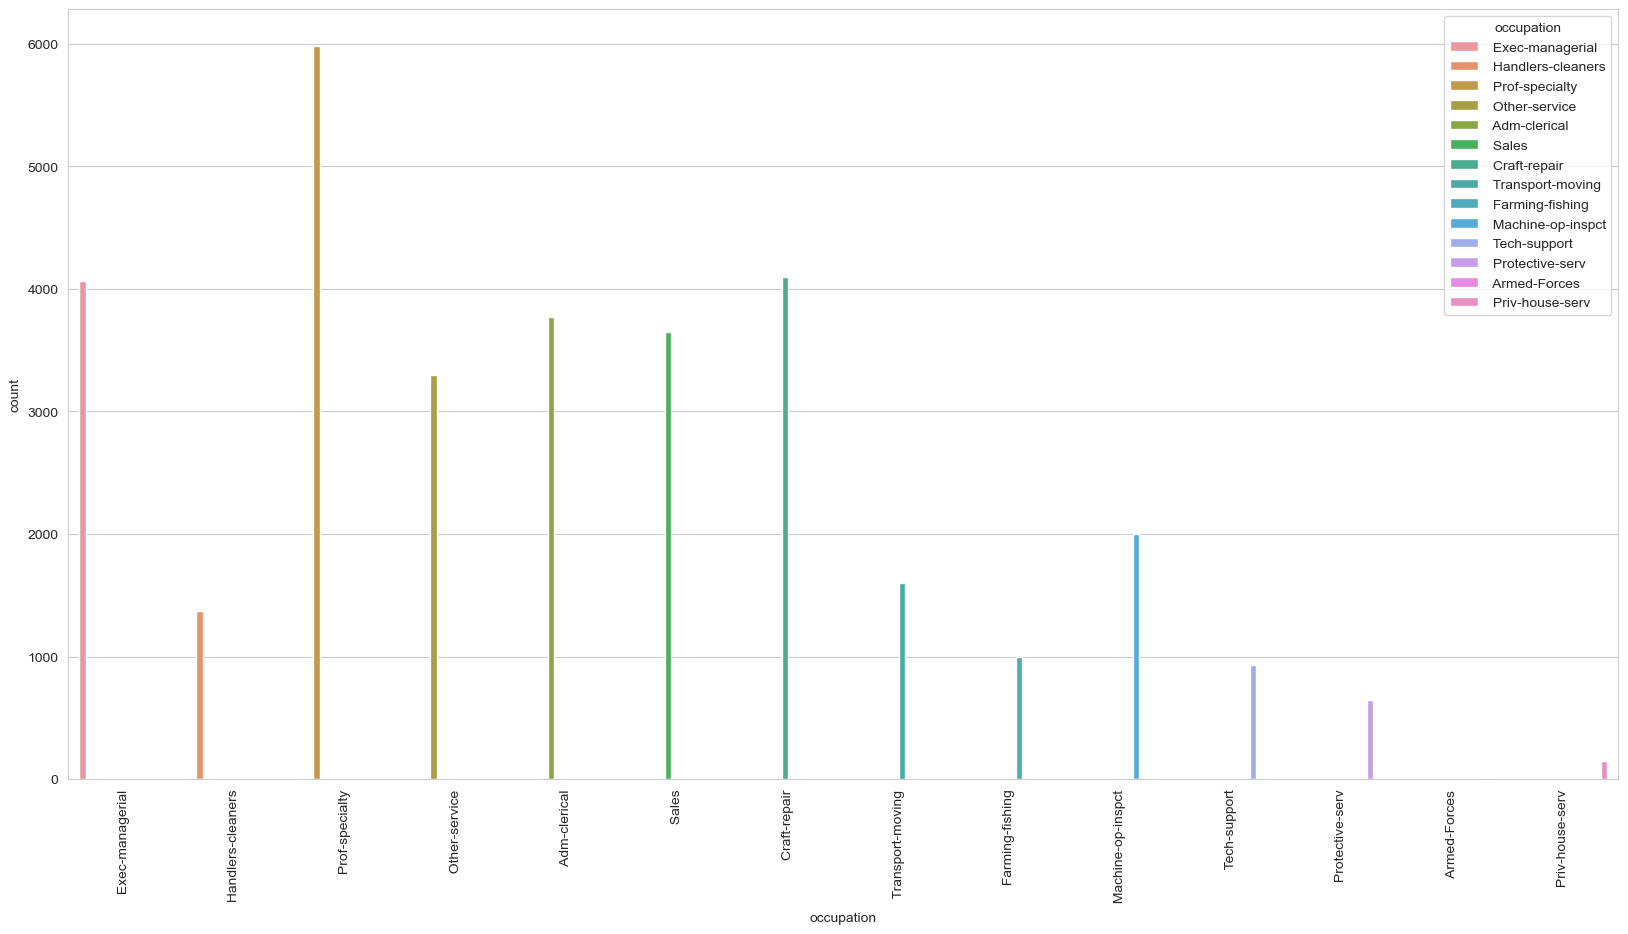

<Axes: xlabel='salary', ylabel='count'>

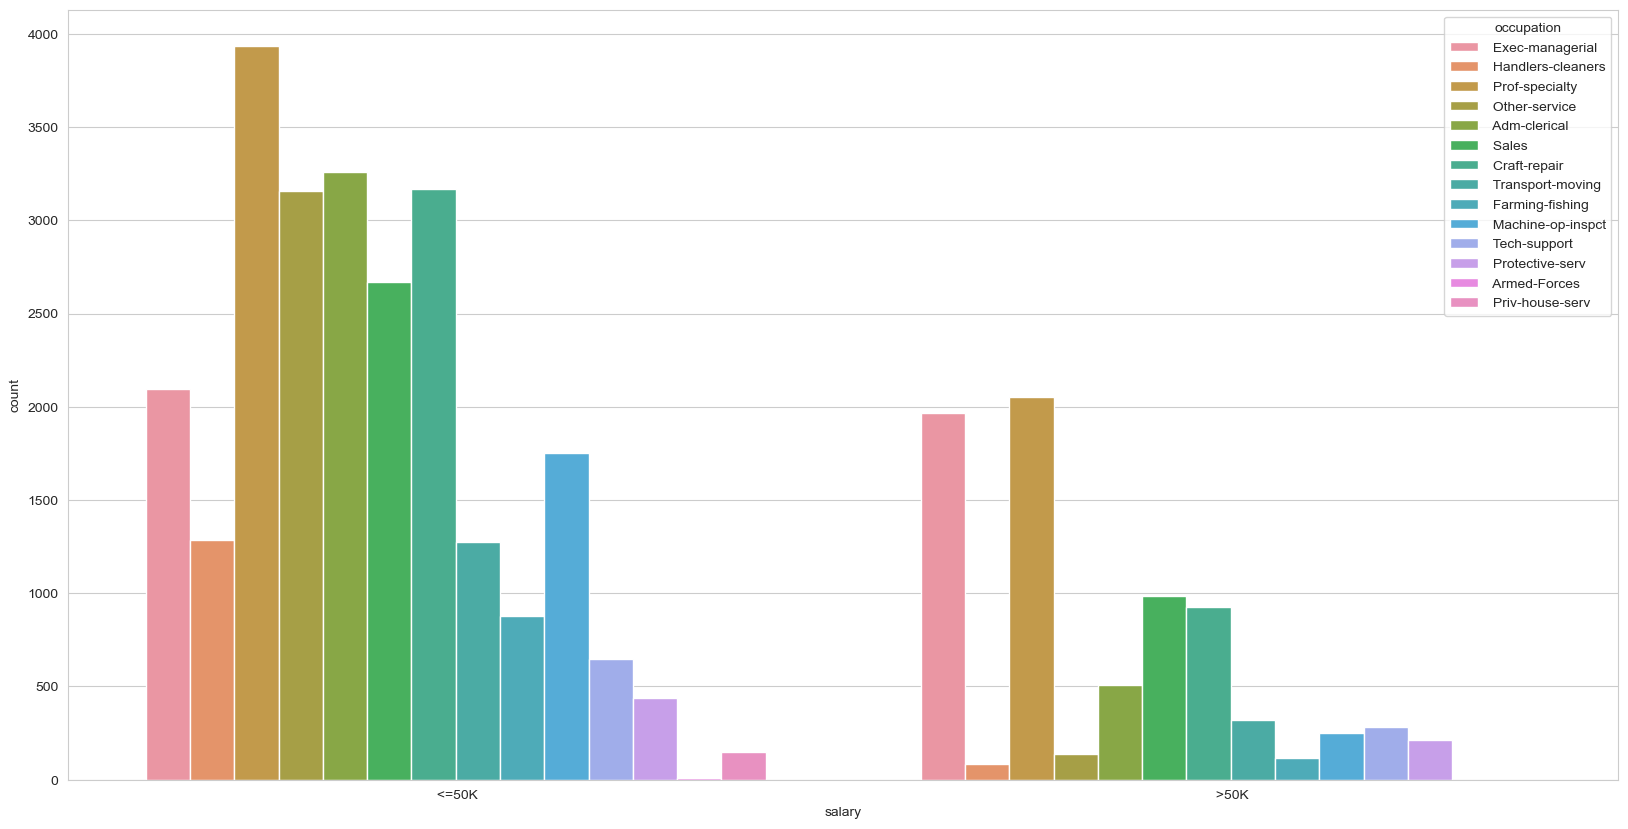

In [ ]:
# Substituting question marks with most frequent value in the occupation column using simple imputer
imputer = SimpleImputer(missing_values=' ?', strategy = 'most_frequent')
occupation_imputed = imputer.fit_transform(data_adult[['occupation']])
data_adult['occupation'] = occupation_imputed

print("Occupation in percentage :")
display(data_adult['occupation'].value_counts(normalize = True)*100)

plt.figure(figsize = (20,10))
plt.xticks(rotation = 90)
sns.countplot(x = 'occupation',hue = 'occupation', data = data_adult)
plt.show()

plt.figure(figsize = (20,10))
sns.countplot(x = 'salary', hue = 'occupation', data = data_adult)

In [ ]:
# Doing Label Encoding on occupation

import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the selected column
data_adult["occupation"] = label_encoder.fit_transform(data_adult["occupation"])

In [ ]:
#visualizing the implementation
data_adult.head()

,age,workclass,fnlwgt,education,education_rank,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary,Capital gain/loss
0,50,1,83311,Bachelors,13,0,3,Husband,0,1,0,0,13,United-States,<=50K,0
1,38,0,215646,HS-grad,9,1,5,Not-in-family,0,1,0,0,40,United-States,<=50K,0
2,53,0,234721,11th,7,0,5,Husband,1,1,0,0,40,United-States,<=50K,0
3,28,0,338409,Bachelors,13,0,9,Wife,1,0,0,0,40,Cuba,<=50K,0
4,37,0,284582,Masters,14,0,3,Wife,0,0,0,0,40,United-States,<=50K,0


SECTION K: ANALYZING COUNTRY COLUMN

In [ ]:
# imputing most frequent value in place of question marks
imputer = SimpleImputer(missing_values=' ?', strategy = 'most_frequent')
country_imputed = imputer.fit_transform(data_adult[['country']])
data_adult['country'] = country_imputed

print("Country in percentage :")
display(data_adult['country'].value_counts(normalize = True)*100)

Country in percentage :


 United-States                 91.375921
 Mexico                         1.974816
 Philippines                    0.608108
 Germany                        0.420762
 Canada                         0.371622
 Puerto-Rico                    0.350123
 El-Salvador                    0.325553
 India                          0.307125
 Cuba                           0.291769
 England                        0.276413
 Jamaica                        0.248771
 South                          0.245700
 China                          0.230344
 Italy                          0.224201
 Dominican-Republic             0.214988
 Vietnam                        0.205774
 Guatemala                      0.196560
 Japan                          0.190418
 Poland                         0.184275
 Columbia                       0.181204
 Taiwan                         0.156634
 Haiti                          0.135135
 Iran                           0.132064
 Portugal                       0.113636
 Nicaragua      

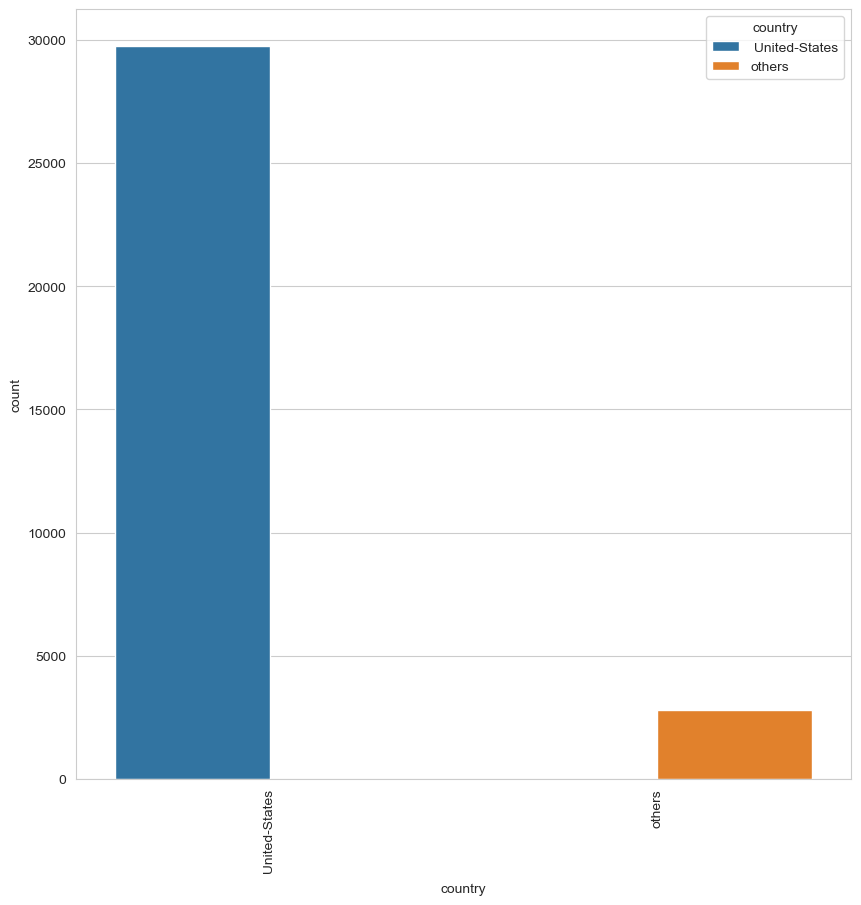

<Axes: xlabel='salary', ylabel='count'>

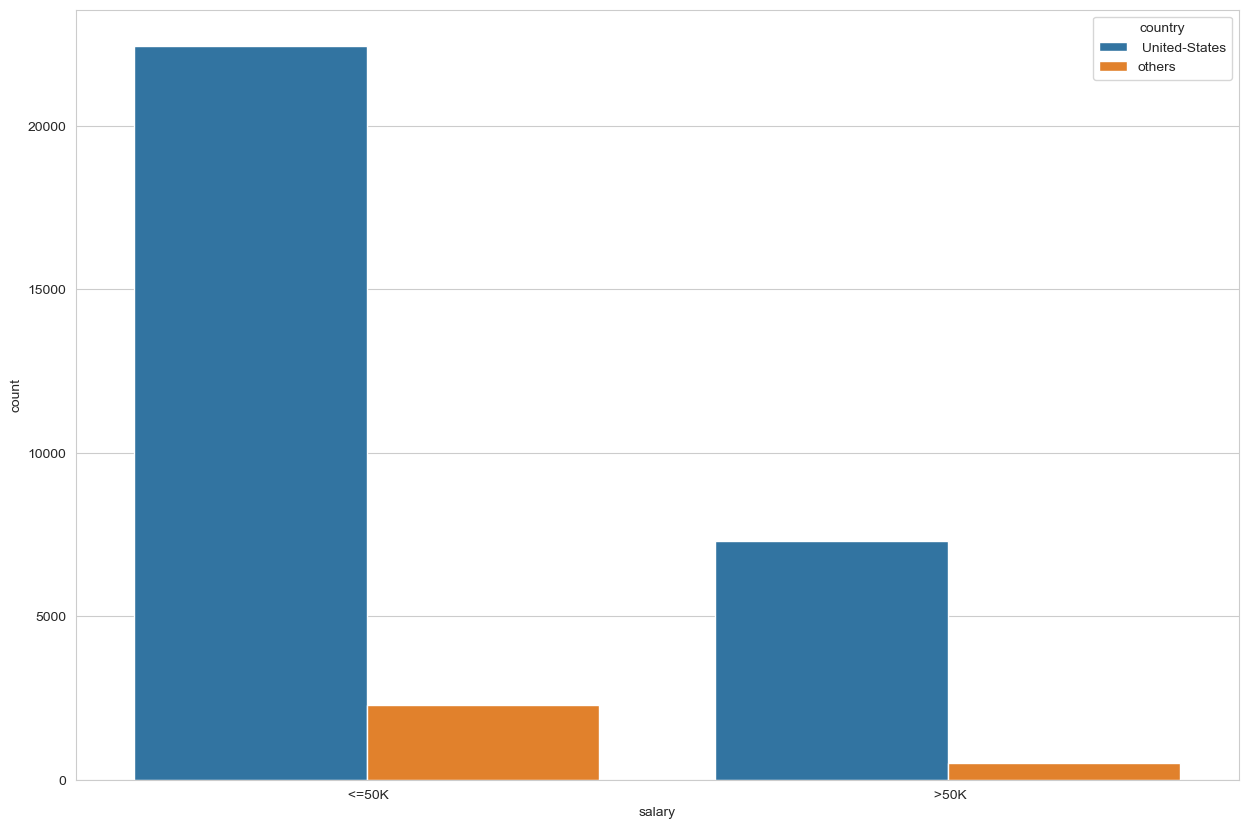

In [ ]:
# Naming values in workclass column as others where value count is less than 2% of total values
arr_others = data_adult['country'].value_counts(normalize=True)[data_adult['country'].value_counts(normalize=True)*100 < 2].index
data_adult.replace(to_replace = arr_others, value = ['others']*len(arr_others), inplace = True)


plt.figure(figsize = (10,10))
plt.xticks(rotation = 90)
sns.countplot(x = 'country',hue = 'country', data = data_adult)
plt.show()

plt.figure(figsize = (15,10))
sns.countplot(x = 'salary', hue = 'country', data = data_adult)

In [ ]:
# Doing Label Encoding on country

import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the selected column
data_adult["country"] = label_encoder.fit_transform(data_adult["country"])

Clearly, from the graph, most of the data points that we have belong to United States in the country column

SECTION L: ANALYZING HOURS PER WEEK COLUMN

In [ ]:
#imputer = SimpleImputer(missing_values=' ?', strategy = 'most_frequent')
#hours_imputed = imputer.fit_transform(data_adult[['hours_per_week']])
#data_adult['hours_per_week'] = hours_imputed
display(data_adult['hours_per_week'].value_counts())


print("hours_per_week in percentage :")
display(data_adult['hours_per_week'].value_counts(normalize = True)*100)

40    15216
50     2819
45     1824
60     1475
35     1297
      ...  
82        1
94        1
92        1
74        1
87        1
Name: hours_per_week, Length: 94, dtype: int64

hours_per_week in percentage :


40    46.732187
50     8.657862
45     5.601966
60     4.530098
35     3.983415
        ...    
82     0.003071
94     0.003071
92     0.003071
74     0.003071
87     0.003071
Name: hours_per_week, Length: 94, dtype: float64

SECTION M: ANALYZING RELATIONSHIP COLUMN

In [ ]:
data_adult['relationship'].unique()

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

RELATIONSHIP IS SIMILAR TO MARITAL STATUS, HENCE WILL BE DROPPED TO REMOVE THE BIAS OF ONE FEATURE AGAINST THE OTHERS

Section N: DROPPING COLUMNS THAT ARE LEAST EFFECTIVE

In [ ]:
# Drop unneeded columns, Converting values of salary column(target feature) to binary values
data_adult = data_adult.drop(columns=['education','relationship','capital_gain','capital_loss','Capital gain/loss'])

# Substituting 0 where salary is <=50K and 1 where salary is more than 50K
data_adult.replace(to_replace=[' <=50K', ' >50K'], value = [0, 1], inplace = True)

#VISUALIZING THE DATA AFTER DROPPING UNNEEDED COLUMNS
data_adult.head()

,age,workclass,fnlwgt,education_rank,marital_status,occupation,race,sex,hours_per_week,country,salary
0,50,1,83311,13,0,3,0,1,13,0,0
1,38,0,215646,9,1,5,0,1,40,0,0
2,53,0,234721,7,0,5,1,1,40,0,0
3,28,0,338409,13,0,9,1,0,40,1,0
4,37,0,284582,14,0,3,0,0,40,0,0


SECTION O: ANALYZING THE TARGET - SALARY

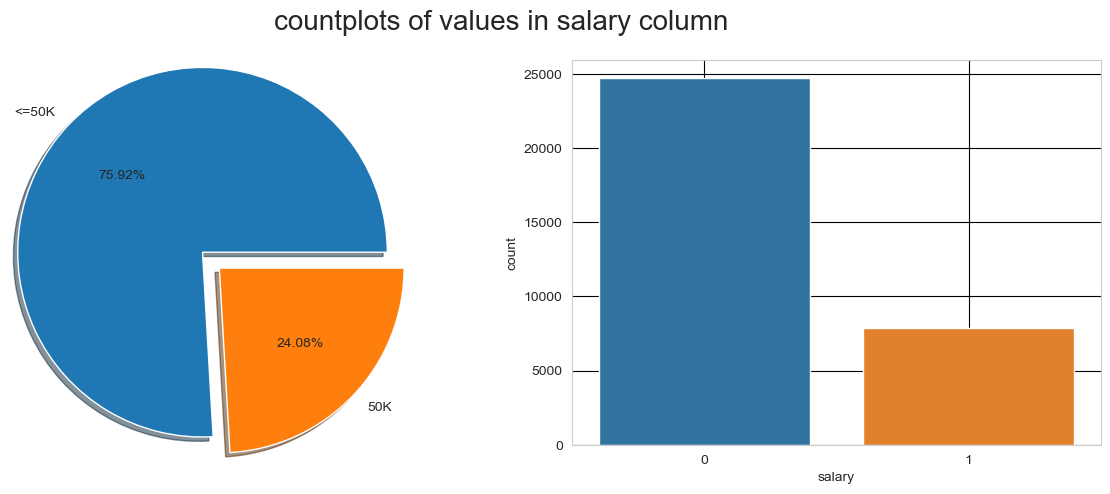

In [ ]:
#Visualizing the target (salary) column
fig, axes = plt.subplots(nrows = 1, ncols=2, figsize = (15,5))
ax1 = axes[0]
ax2 = axes[1]
ax1.pie(data_adult['salary'].value_counts(normalize=True), explode = [0, 0.15], autopct = '%1.2f%%', labels = ['<=50K', '50K'],\
        radius=1.2, shadow = True)
sns.set_style(style = 'dark')
sns.countplot(x = 'salary', data = data_adult)
fig.suptitle('countplots of values in salary column', fontsize = 20)
ax2.grid(True, color='black')
plt.show()

FEATURE(S) SELECTION Using correlation to check which feature I will use that most affect the target SALARY

SECTION P: RIDGE REGRESSION ERROR, FORWARD FEATURE SELECTION, BACKWARD FEATURE SELECTION AND HEATMAP CORRELATION

Ridge Regression Error: 0.23135


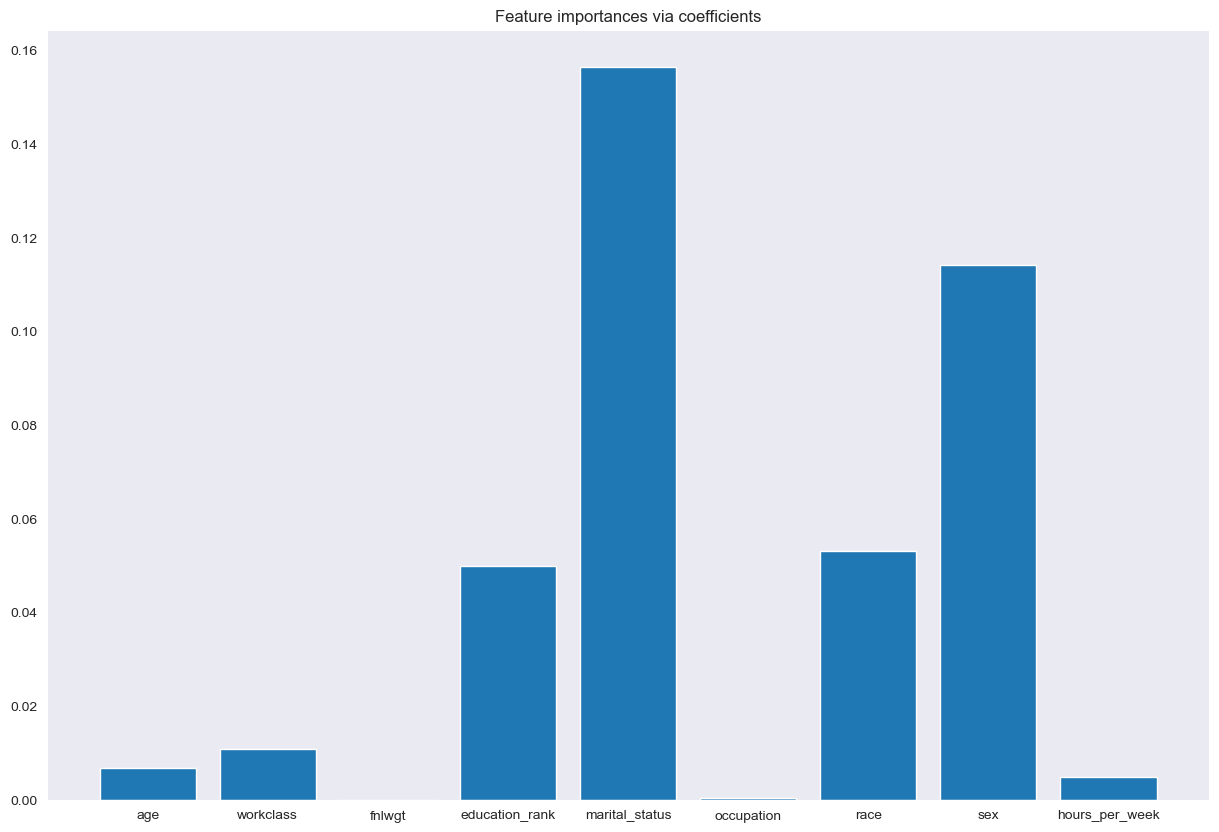

In [ ]:
import warnings
warnings.filterwarnings("ignore")
Xsfs = data_adult.iloc[:,0:9]
ysfs = data_adult.iloc[:,-1]

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import RidgeCV # RidgeCV = GridSearchCV + Ridge (for regression)


ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(Xsfs, ysfs)
print("Ridge Regression Error: %.5f" % (ridge.score(Xsfs, ysfs)))

importance = np.abs(ridge.coef_)
feature_names = np.array(Xsfs.columns)
plt.figure(figsize = (15,10))
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.show()

Using the top 4 features through a rigorous selection method

In [ ]:
#Forward Feature Selection

from sklearn.feature_selection import SequentialFeatureSelector
from time import time
ridge = RidgeCV(alphas=np.logspace(-6, 6, num=8)).fit(Xsfs, ysfs)
tic_fwd = time()
sfs_forward = SequentialFeatureSelector(ridge, n_features_to_select=4, direction="forward")
sfc_forward = sfs_forward.fit(Xsfs, ysfs)
toc_fwd = time()

print(
    "Features selected by forward sequential selection: "
    f"{feature_names[sfs_forward.get_support()]}"
)
print(f"Done in {toc_fwd - tic_fwd:.3f}s")

Features selected by forward sequential selection: ['age' 'education_rank' 'sex' 'hours_per_week']
Done in 3.190s


In [ ]:
#Backward Feature Selection

from sklearn.feature_selection import SequentialFeatureSelector
from time import time
ridge = RidgeCV(alphas=np.logspace(-6, 6, num=8)).fit(Xsfs, ysfs)
tic_fwd = time()
sfs_backward = SequentialFeatureSelector(ridge, n_features_to_select=4, direction="backward")
sfc_backward = sfs_backward.fit(Xsfs, ysfs)
toc_fwd = time()

print(
    "Features selected by forward sequential selection: "
    f"{feature_names[sfs_backward.get_support()]}"
)
print(f"Done in {toc_fwd - tic_fwd:.3f}s")

Features selected by forward sequential selection: ['age' 'education_rank' 'sex' 'hours_per_week']
Done in 7.584s


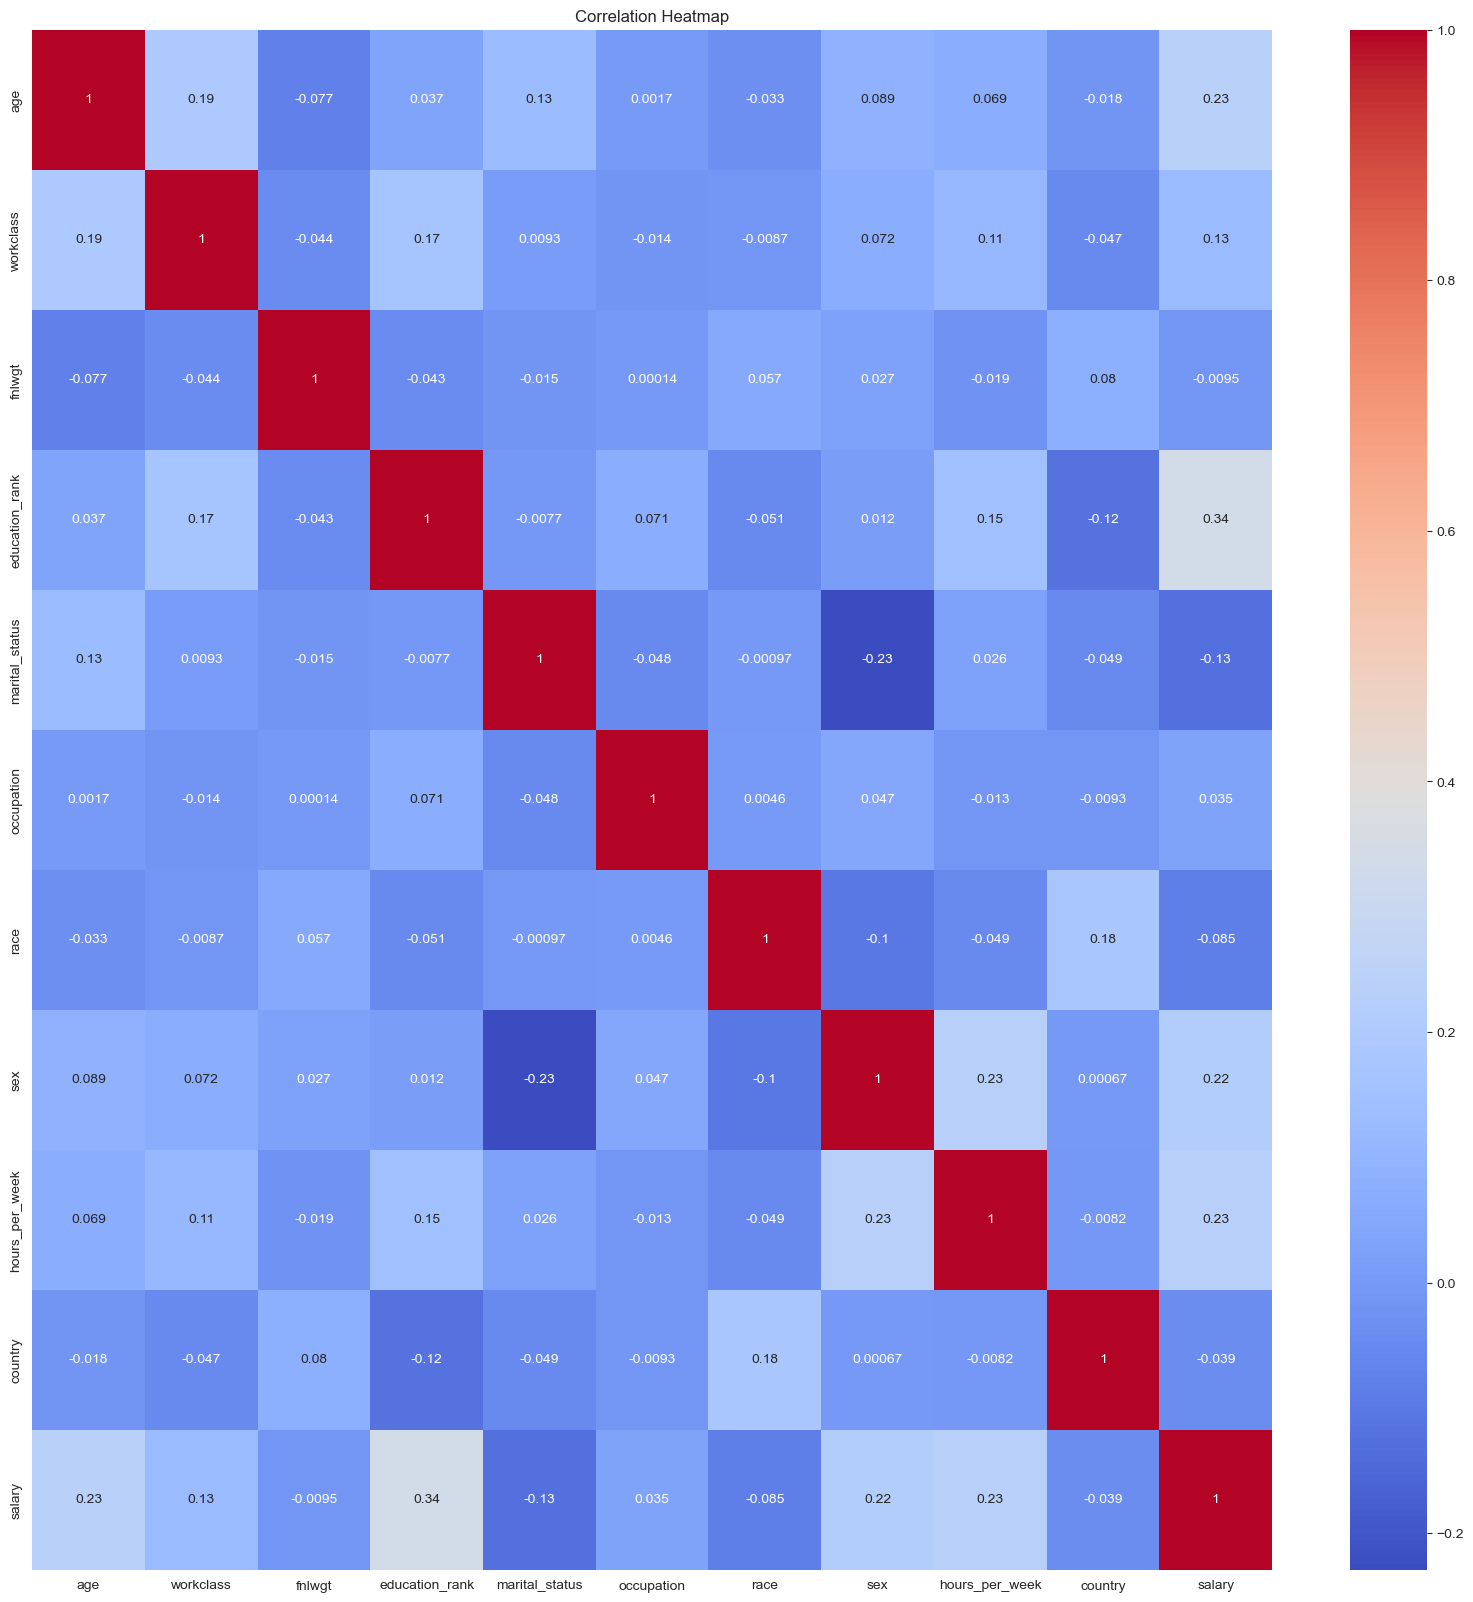

Index(['salary', 'education_rank', 'age', 'hours_per_week', 'sex',
       'marital_status', 'workclass', 'race', 'country'],
      dtype='object')
[1.         0.33518184 0.23403878 0.22968958 0.215995   0.12579571
 0.12560993 0.08523228 0.03894764]


In [ ]:
correlation_matrix = data_adult.corr()

# Create heatmap
plt.figure(figsize = (20,20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Set plot title
plt.title('Correlation Heatmap')

# Display the plot
plt.show()
print(data_adult.corr().abs().nlargest(9,'salary').index)
print(data_adult.corr().abs().nlargest(9,'salary').values[:,10])

Salary ovbiously got 1 for correlating itself. The top 4 correlation features are Education Rank (0.33518184),
Age (0.23403878), hours_per_week (0.22968958), and sex (0.215995). Forward Feature Selection and Backward Feature Selection have added to this notion. These are the features I will work on.

SECTION Q: NORMALIZATION AND PRINCIPAL COMPONENT ANALYSIS (PCA)

In [ ]:
# Normalization for PCA analysis
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

# Fitting only on training and test data
n_data_adult = scale.fit_transform(data_adult)

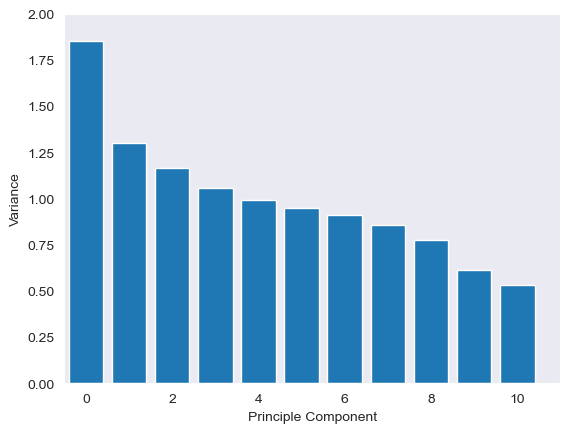

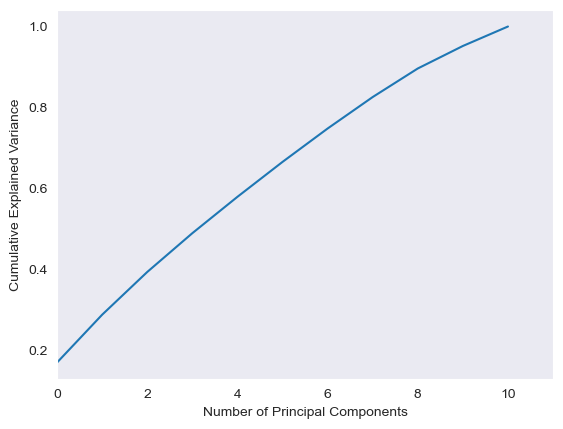

In [ ]:
#PRINCIPAL COMPONENT ANALYSIS
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=11)
pca.fit(n_data_adult)

# Plot explained variance
plt.bar(range(pca.n_components_), pca.explained_variance_)
plt.xlabel('Principle Component')
plt.ylabel('Variance')
plt.xlim([-0.5, 11])
plt.ylim([0, 2])
plt.savefig('pca1.png')
plt.show()

# Plot cumulative explained variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0, 11, emit=True)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.savefig('pca2.png')
plt.show()

SECTION R: 1. DROP UNNEEDED COLUMNS, CONVERTING VALUES OF SALARY COLUMN TO BINARY VALUES
2. PAIRPLOT VISUALISATION

Model Development & Classification

In [ ]:
data_adult_d = data_adult.drop(columns=['workclass','fnlwgt','marital_status','occupation','race','country'])

In [ ]:
#Checking the target variable count
data_adult.salary.value_counts()

0    24719
1     7841
Name: salary, dtype: int64

THERE IS NO SIGNIFICANT DISPARITY TO NECCESITATE DATA IMBALANCE PROBLEM

In [ ]:
data_adult_d.head()

,age,education_rank,sex,hours_per_week,salary
0,50,13,1,13,0
1,38,9,1,40,0
2,53,7,1,40,0
3,28,13,0,40,0
4,37,14,0,40,0


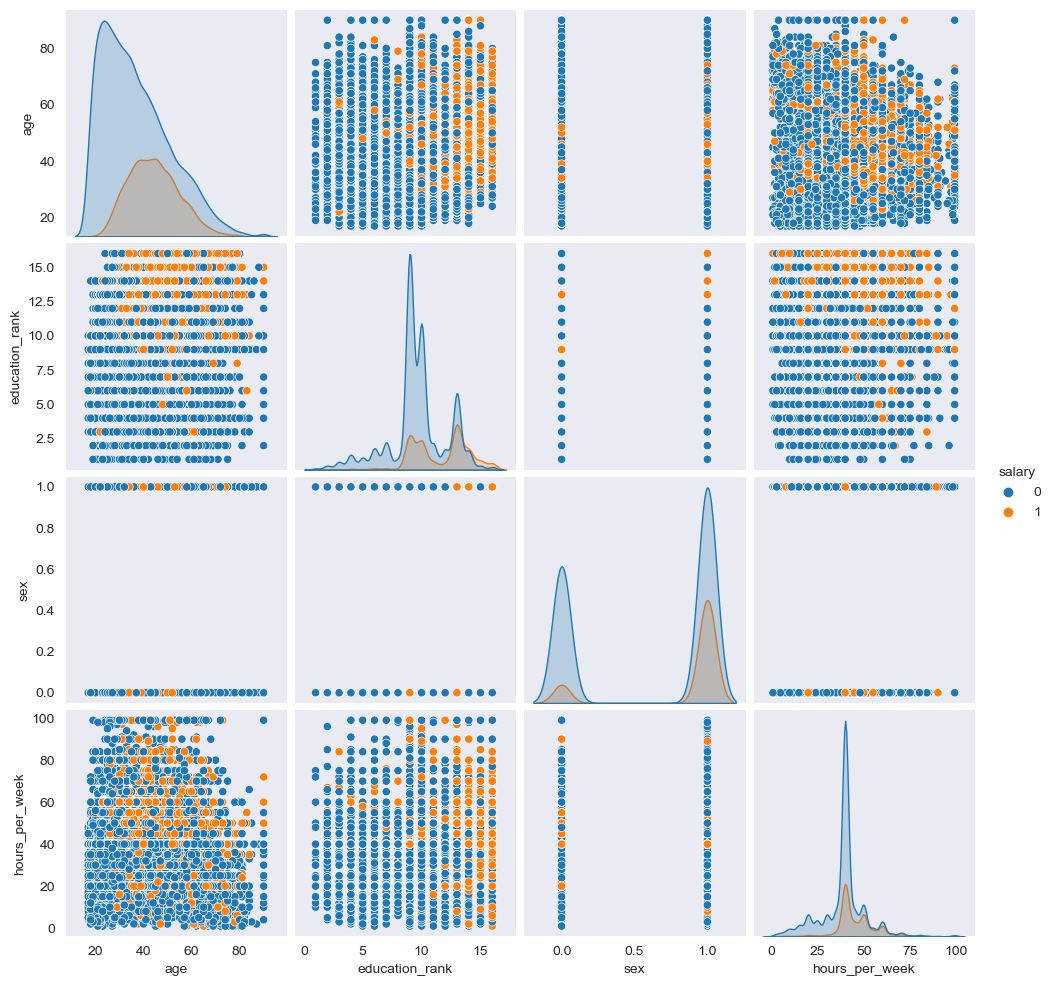

In [ ]:
#VISUALIZE THE FEATURES THROUGH PAIRPLOT
# Create a pair plot
sns.pairplot(data_adult_d, hue='salary')

# Display the plot
plt.show()

SECTION S: SPLITING THE DATA INTO TESTING DATA AND TRAINING DATA AND NORMALISATION

In [ ]:
#Preparing for test and Train Data
X = data_adult_d.iloc[:,:-1]
y = data_adult_d.iloc[:,-1]

In [ ]:
X,y

(       age  education_rank  sex  hours_per_week
 0       50              13    1              13
 1       38               9    1              40
 2       53               7    1              40
 3       28              13    0              40
 4       37              14    0              40
 ...    ...             ...  ...             ...
 32555   27              12    0              38
 32556   40               9    1              40
 32557   58               9    0              40
 32558   22               9    1              20
 32559   52               9    0              40
 
 [32560 rows x 4 columns],
 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 32555    0
 32556    1
 32557    0
 32558    0
 32559    1
 Name: salary, Length: 32560, dtype: int64)

In [ ]:
# convert to numpy arrays
X = np.asarray(X.values)
y = np.asarray(y.values).squeeze()

In [ ]:
#data splitting for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Normalization for processing
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

# Fitting only on training and test data
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

FINALIZING DATA PREPARATION AND PREPROCESSING

In [ ]:
print(X_test.shape, y_test.shape)

(6512, 4) (6512,)


SECTION T: MODELS TUNED BY HYPERPARAMETERS
1. Decision Tree; 2. Logistic Regression; 3. Support Vector Machine; 4. Gaussian Naive Bayes; 5. Random Forest; 6. KNN

In [ ]:
# 1. Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param = {
    'criterion': ['gini', "entropy"],
    'max_depth': [i for i in range(5, 51, 5)],
    'min_samples_leaf': [i for i in range(2, 11, 1)],
    'min_impurity_decrease': [0.1, 0.2, 0.3, 0.4, 0.5]
}
grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid=param, cv=6)
grid_dt.fit(X_train, y_train)
print('Best Decision Tree Classifier:', grid_dt.best_params_, 'Best Score:', grid_dt.best_score_)

Best Decision Tree Classifier: {'criterion': 'gini', 'max_depth': 5, 'min_impurity_decrease': 0.1, 'min_samples_leaf': 2} Best Score: 0.7586762929760417


In [ ]:
#run again with entropy to check for better result using the best given parameters above
dt_clf = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_leaf=2, min_impurity_decrease=0.1)
dt_clf.fit(X_train, y_train)
print("Decision Tree accuracy: %.2f%%" % (100*dt_clf.score(X_test, y_test)))

Decision Tree accuracy: 76.12%


In [ ]:
# 2. Logistic Regression

import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_logreg = {
    'penalty': ['l1','l2'],
    'C': [c / 10.0 for c in range(1, 10, 1)] + list(range(10, 101, 1)), # [30, 50, 60, 100]
}
grid_logreg = GridSearchCV(LogisticRegression(), param_grid=param_logreg, cv=5) # default scoring: accuracy_score
grid_logreg.fit(X_train, y_train)
print('Best Logistic Regresion Classifier:', grid_logreg.best_params_, 'Best Score:', grid_logreg.best_score_)

Best Logistic Regresion Classifier: {'C': 0.1, 'penalty': 'l2'} Best Score: 0.8018275544799364


In [ ]:
#run again for better output without tunning but reserving the best parameters
from sklearn.linear_model import LogisticRegression

lg_clf = LogisticRegression(penalty='l2', C=1.0)
lg_clf.fit(X_train, y_train)
print("Logistic Regression accuracy: %.2f%%" % (100*lg_clf.score(X_test, y_test)))

Logistic Regression accuracy: 80.61%


Support Vector Machine

In [ ]:
# 3.SVM

from sklearn.svm import LinearSVC

param_svm = {
    "penalty": ["l1", "l2"],
    "C": list(range(1,5)),
    "max_iter": list(range(100, 1001, 100))
}

grid_svm = GridSearchCV(LinearSVC(), param_grid=param_svm, cv=2) # default scoring: accuracy_score
grid_svm.fit(X_train, y_train)
print('Best SVM_SVC:', grid_svm.best_params_, 'Best Score:', grid_svm.best_score_)

Best SVM_SVC: {'C': 3, 'max_iter': 100, 'penalty': 'l2'} Best Score: 0.8019425675675675


In [ ]:
#run again for better output without tunning but reserving the best parameters
lin_svc_clf = LinearSVC(penalty="l2", C=4.0, max_iter=100)
lin_svc_clf = lin_svc_clf.fit(X_train, y_train)
print("SVM_SVC's accuracy: %.2f%%" % (100*lin_svc_clf.score(X_test, y_test)))

SVM_SVC's accuracy: 77.09%


In [ ]:
#using svm.SVC this time around
from sklearn import svm
from sklearn.metrics import accuracy_score
# Create an SVM classifier
clf = svm.SVC()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Use the trained classifier to make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("SVM Accuracy: %.2f%%" % (100*accuracy))

SVM Accuracy: 81.57%


In [ ]:
# 4. Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

param_gnb = {
    'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]
}

grid_gnb = GridSearchCV(GaussianNB(), param_gnb, cv=2)
grid_gnb.fit(X_train, y_train)
print('Best GNB Classifier:', grid_gnb.best_params_, 'Best Score:', grid_gnb.best_score_)

Best GNB Classifier: {'var_smoothing': 0.0001} Best Score: 0.804284398034398


In [ ]:
#run again, checking for better output without tunning
gnb_clf = GaussianNB()
gnb_clf = gnb_clf.fit(X_train, y_train)
gnb_clf = gnb_clf.score(X_test,y_test)
print("GNB Accuracy: %.2f%%" % (100*gnb_clf))

GNB Accuracy: 80.99%


Random Forest

In [ ]:
# 5. Random Forest
from sklearn.ensemble import RandomForestClassifier

param_rf = {
    "criterion": ["gini", "entropy"],
    "n_estimators": list(range(100, 500, 100))
}

grid_rf = GridSearchCV(RandomForestClassifier(), param_grid=param_rf, cv=2)
grid_rf.fit(X_train, y_train)
print('Best RF Classifier:', grid_rf.best_params_, 'Best Score:', grid_rf.best_score_)

Best RF Classifier: {'criterion': 'gini', 'n_estimators': 400} Best Score: 0.7772957616707616


In [ ]:
rf_clf = RandomForestClassifier(criterion="entropy", n_estimators=200)
rf_clf.fit(X_train, y_train)
print("Random Forest Accuracy: %.2f%%" % (100*rf_clf.score(X_test, y_test)))

Random Forest Accuracy: 79.16%


In [ ]:
# 6. KNN

from sklearn.neighbors import KNeighborsClassifier

# Applying & fine tuning K-Nearest Neighbor

best_score = 0.0

best_k = -1

for k in range(1, 11):

    knn_clf_sk = KNeighborsClassifier(n_neighbors=k)

    knn_clf_sk.fit(X_train, y_train)

    score = knn_clf_sk.score(X_test, y_test)

    if score > best_score:

        best_k = k

        best_score = score

print("best_k = " + str(best_k))

# Evaluate the accuracy of the classifier
print("Accuracy:", score)
print("KNN Accuracy: %.2f%%" % (100*score))

best_k = 10
Accuracy: 0.8037469287469288
KNN Accuracy: 80.37%


SECTION U: APPLYING BOOST CLASSIFIERS

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold
import time
clf1 = AdaBoostClassifier() #  If estimator is not set then it is DecisionTreeClassifier of max_depth=1.
clf2 = GradientBoostingClassifier()
clf3 = LGBMClassifier()
clf4 = XGBClassifier()

for clf, label in zip([clf1, clf2, clf3, clf4],
                      ['AdaBoost', 'GBDT','LightGBM','XGBoost']):
    start = time.time()
    scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=10)
    end = time.time()
    running_time = end - start
    print("Accuracy: %0.8f (+/- %0.2f), time elapsed %0.2f seconds. Model Name[%s]" %
          (scores.mean(), scores.std(), running_time, label))

Accuracy: 0.80743224 (+/- 0.00), time elapsed 13.57 seconds. Model Name[AdaBoost]
Accuracy: 0.80962047 (+/- 0.00), time elapsed 34.57 seconds. Model Name[GBDT]
Accuracy: 0.80493704 (+/- 0.00), time elapsed 11.54 seconds. Model Name[LightGBM]
Accuracy: 0.80397721 (+/- 0.00), time elapsed 25.19 seconds. Model Name[XGBoost]


GBDT BOOST IS THE BEST

SECTION V: ENSEMBLES - Bagging and Boosting (Bootstrap Aggregating): BaggingClassifiers

In [ ]:
#BAGGING DECISION TREE

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dt_bc = BaggingClassifier(DecisionTreeClassifier(), n_estimators=20, bootstrap=True)
dt_bc.fit(X_train, y_train)

print("DT_BAG's training accuracy: %.2f%%" % (100 * dt_bc.score(X_train, y_train)))
print("DT_BAG's test accuracy: %.2f%%" % (100 * dt_bc.score(X_test, y_test)))

DT_BAG's training accuracy: 86.27%
DT_BAG's test accuracy: 78.67%


In [ ]:
#BAGGING LOGISTIC REGRESSION

from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

logreg_bag_clf = BaggingClassifier(LogisticRegression(penalty='l2', C=4.0), n_estimators=500, bootstrap=True)
logreg_bag_clf.fit(X_train, y_train)

print("LogReg_BAG's training accuracy: %.2f%%" % (100 * logreg_bag_clf.score(X_train, y_train)))
print("LogReg_BAG's test accuracy: %.2f%%" % (100 * logreg_bag_clf.score(X_test, y_test)))

LogReg_BAG's training accuracy: 80.23%
LogReg_BAG's test accuracy: 80.54%


In [ ]:
#BAGGING SVM

from sklearn.ensemble import BaggingClassifier

lin_svc_bag_clf = BaggingClassifier(svm.SVC(), bootstrap=True)
lin_svc_bag_clf.fit(X_train, y_train)

print("LinSVC_BAG's training accuracy: %.2f%%" % (100 * lin_svc_bag_clf.score(X_train, y_train)))
print("LinSVC_BAG's test accuracy: %.2f%%" % (100 * lin_svc_bag_clf.score(X_test, y_test)))

LinSVC_BAG's training accuracy: 80.84%
LinSVC_BAG's test accuracy: 81.57%


In [ ]:
#BAGGING GUASSIAN NAIVE BAYES

from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB

gnb_bag_clf = BaggingClassifier(GaussianNB(), n_estimators=1000, bootstrap=True)
gnb_bag_clf.fit(X_train, y_train)

print("GNB_BAG's training accuracy: %.2f%%" % (100 * gnb_bag_clf.score(X_train, y_train)))
print("GNB_BAG's test accuracy: %.2f%%" % (100 * gnb_bag_clf.score(X_test, y_test)))

GNB_BAG's training accuracy: 80.61%
GNB_BAG's test accuracy: 80.99%


In [ ]:
#BAGGING RANDOM FOREST

from sklearn.ensemble import BaggingClassifier
rf_bag_clf = BaggingClassifier(RandomForestClassifier(bootstrap=True))
rf_bag_clf.fit(X_train, y_train)

print("RF_BAG's training accuracy: %.2f%%" % (100 * rf_bag_clf.score(X_train, y_train)))
print("RF_BAG's test accuracy: %.2f%%" % (100 * rf_bag_clf.score(X_test, y_test)))

RF_BAG's training accuracy: 85.27%
RF_BAG's test accuracy: 79.65%


In [ ]:
#BAGGING KNN

from sklearn.ensemble import BaggingClassifier
knn_bag_clf = BaggingClassifier(KNeighborsClassifier(n_neighbors=10))
knn_bag_clf.fit(X_train, y_train)

print("RF_KNN's training accuracy: %.2f%%" % (100 * knn_bag_clf.score(X_train, y_train)))
print("RF_KNN's test accuracy: %.2f%%" % (100 * knn_bag_clf.score(X_test, y_test)))

RF_KNN's training accuracy: 82.27%
RF_KNN's test accuracy: 80.84%


SECTION W: BOOSTING WITH ADAPTIVE BOOSTING (ADABOOST)

In [ ]:
#ADABOOST ON DECISION TREE

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

dt_ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=500,
                                algorithm="SAMME.R", learning_rate=0.5)
dt_ada_clf.fit(X_train, y_train)

print("DT_ADA's training accuracy: %.2f%%" % (100 * dt_ada_clf.score(X_train, y_train)))
print("DT_ADA's test accuracy: %.2f%%" % (100 * dt_ada_clf.score(X_test, y_test)))

DT_ADA's training accuracy: 82.46%
DT_ADA's test accuracy: 81.05%


In [ ]:
#ADABOOST ON LOGISTIC REGRESSION

from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

logreg_ada_clf = AdaBoostClassifier(LogisticRegression(penalty='l2', C=4.0), n_estimators=2500, algorithm="SAMME.R", learning_rate=0.5)
logreg_ada_clf.fit(X_train, y_train)

print("logReg_ADA's training accuracy: %.2f%%" % (100 * logreg_ada_clf.score(X_train, y_train)))
print("LogReg_ADA's test accuracy: %.2f%%" % (100 * logreg_ada_clf.score(X_test, y_test)))

logReg_ADA's training accuracy: 80.07%
LogReg_ADA's test accuracy: 80.28%


In [ ]:
#ADABOOST ON SVM

from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC

# try different number of estimators,
lin_svc_ada_clf = AdaBoostClassifier(LinearSVC(penalty="l2", C=2.0, max_iter=1000), n_estimators=2500,
                                     algorithm="SAMME", learning_rate=0.5)

lin_svc_ada_clf.fit(X_train, y_train)

print("LinSVC_ADA's training accuracy: %.2f%%" % (100 * lin_svc_ada_clf.score(X_train, y_train)))
print("LinSVC_ADA's test accuracy: %.2f%%" % (100 * lin_svc_ada_clf.score(X_test, y_test)))

LinSVC_ADA's training accuracy: 79.96%
LinSVC_ADA's test accuracy: 80.02%


In [ ]:
#ADABOOST ON GNB

from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

gnb_ada_clf = AdaBoostClassifier(GaussianNB(), n_estimators=500, algorithm="SAMME.R", learning_rate=0.5)
gnb_ada_clf.fit(X_train, y_train)

print("GNB_ADA's training accuracy: %.2f%%" % (100 * gnb_ada_clf.score(X_train, y_train)))
print("GNB_ADA's test accuracy: %.2f%%" % (100 * gnb_ada_clf.score(X_test, y_test)))

GNB_ADA's training accuracy: 80.49%
GNB_ADA's test accuracy: 80.94%


SECTION X: VISUALIZE THE PIPELINE IN CONFUSION MATRIX, METRICS AND ROC/AUC

In [ ]:
from sklearn.metrics import roc_curve, auc, accuracy_score, recall_score, f1_score, precision_score, roc_auc_score, confusion_matrix
import time


def evaluate_classifier(clf, X_train, y_train, X_test, y_test):
    st = time.time()
    # Fit the classifier on the training data
    clf.fit(X_train, y_train)

    # Predict probabilities for the test data
    y_pred = clf.predict(X_test)

    # Calculate the false positive rate, true positive rate, and thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    # Calculate the AUC-ROC
    auc_roc = auc(fpr, tpr)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    mcc = (tp * tn - fp * fn) / ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    g_measure = (2 * precision * recall) / (precision + recall)
    sp = time.time()
    time_taken = sp -st
    # Print the AUC-ROC
    print("AUC-ROC: %.2f%%" % (auc_roc * 100))

    # Print other evaluation metrics as percentages
    print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred) * 100))
    print("Recall/Sensitivity: %.2f%%" % (recall_score(y_test, y_pred) * 100))
    print("F1 Score: %.2f%%" % (f1_score(y_test, y_pred) * 100))
    print("Precision: %.2f%%" % (precision_score(y_test, y_pred) * 100))
    print("Specificity: %.2f%%" % (specificity * 100))
    print("G Measure: %.2f%%" % (g_measure * 100))
    print("Matthew's Correlation Coefficient: %.2f%%" % (mcc * 100))
    print("Totaltime of iteration is: %0.4f seconds" % (time_taken))

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Create a confusion matrix plot
    labels = np.unique(y)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)

    # Set plot labels and title
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')

    # Display the plot
    plt.show()

    # Plot the ROC curve
    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_roc)
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random classifier)
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

Decision Tree:
AUC-ROC: 68.51%
Accuracy: 81.05%
Recall/Sensitivity: 44.50%
F1 Score: 52.86%
Precision: 65.10%
Specificity: 92.52%
G Measure: 52.86%
Matthew's Correlation Coefficient: 42.70%
Totaltime of iteration is: 25.4863 seconds


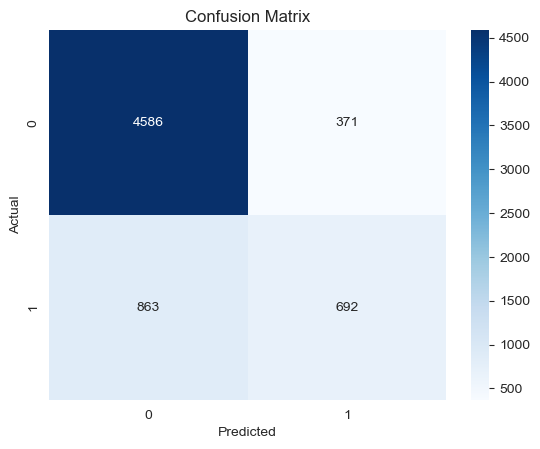

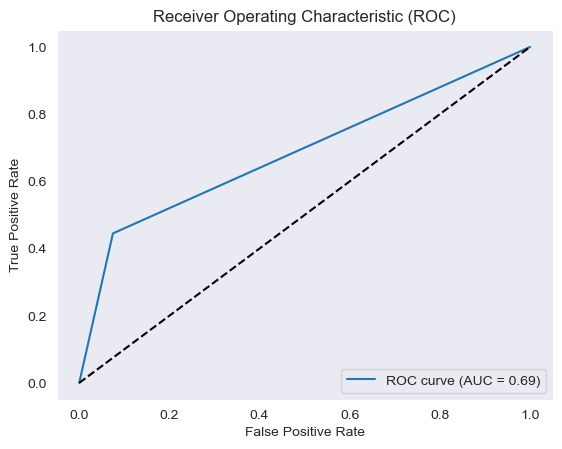

LogisticRegression:
AUC-ROC: 66.08%
Accuracy: 80.61%
Recall/Sensitivity: 38.26%
F1 Score: 48.51%
Precision: 66.26%
Specificity: 93.89%
G Measure: 48.51%
Matthew's Correlation Coefficient: 39.76%
Totaltime of iteration is: 0.0430 seconds


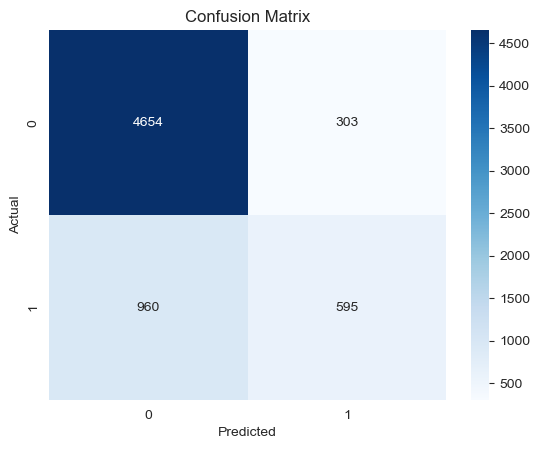

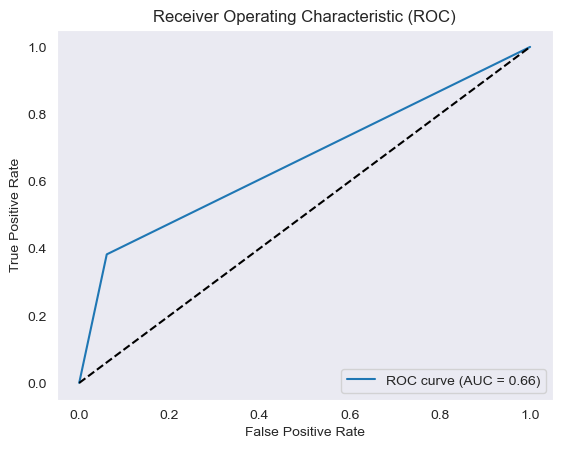


Naive Bayes (GNB) Classifier:
AUC-ROC: 69.35%
Accuracy: 80.99%
Recall/Sensitivity: 47.07%
F1 Score: 54.18%
Precision: 63.82%
Specificity: 91.63%
G Measure: 54.18%
Matthew's Correlation Coefficient: 43.32%
Totaltime of iteration is: 0.0322 seconds


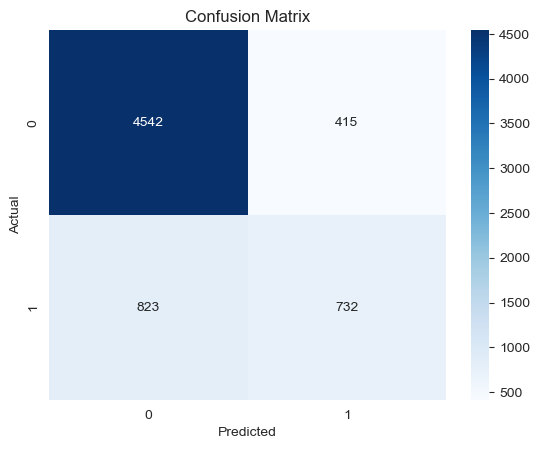

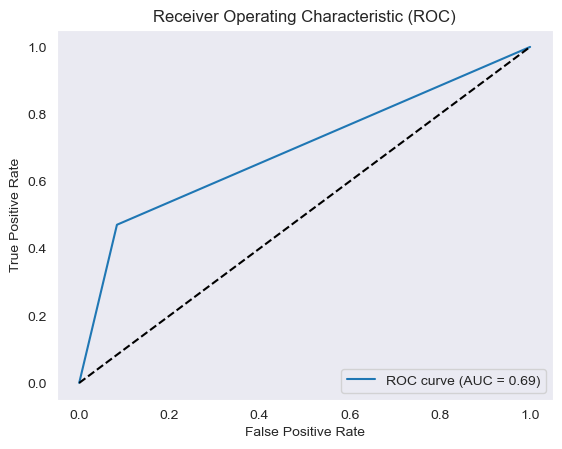


RandomForestClassifier:
AUC-ROC: 66.25%
Accuracy: 78.92%
Recall/Sensitivity: 41.99%
F1 Score: 48.75%
Precision: 58.10%
Specificity: 90.50%
G Measure: 48.75%
Matthew's Correlation Coefficient: 36.66%
Totaltime of iteration is: 7.0975 seconds


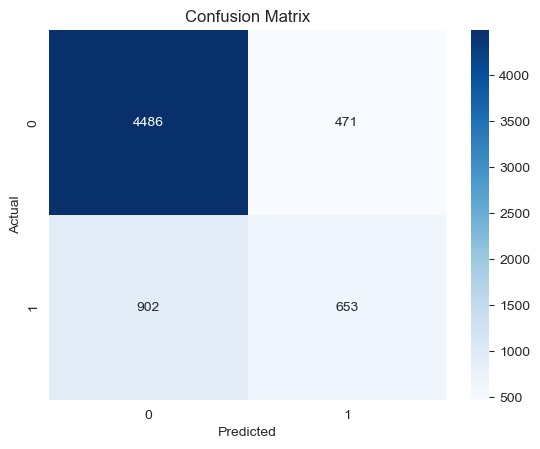

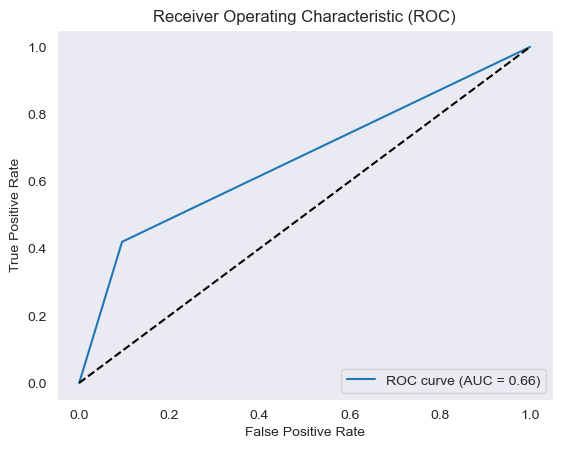


K Nearest Neighbors:
AUC-ROC: 66.90%
Accuracy: 80.37%
Recall/Sensitivity: 41.09%
F1 Score: 50.00%
Precision: 63.84%
Specificity: 92.70%
G Measure: 50.00%
Matthew's Correlation Coefficient: 39.94%
Totaltime of iteration is: 0.5191 seconds


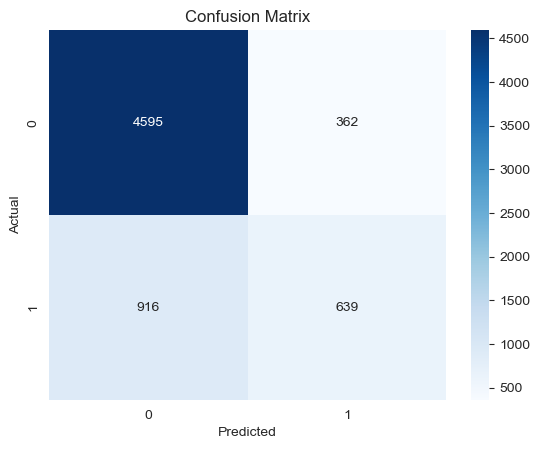

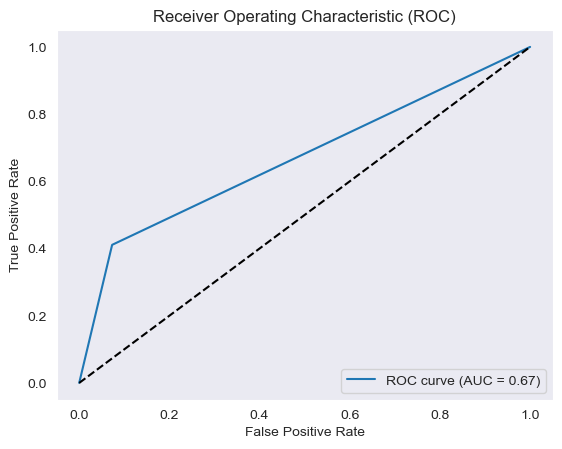

In [ ]:
#FINAL REPORT ON THE CLASSIFIERS
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Initialize classifiers
rf_clf = RandomForestClassifier()
lr_clf = LogisticRegression()
dt_clf = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_leaf=2, min_impurity_decrease=0.1)
knn_clf = KNeighborsClassifier(n_neighbors=10)
gnb_clf = GaussianNB()


# Evaluate Decision Tree
print("Decision Tree:")
evaluate_classifier( dt_ada_clf, X_train, y_train, X_test, y_test)




# Evaluate LogisticRegression
print("LogisticRegression:")
evaluate_classifier(lr_clf, X_train, y_train, X_test, y_test)
print()



# Evaluate RandomForestClassifier
print("Naive Bayes (GNB) Classifier:")
evaluate_classifier(gnb_clf, X_train, y_train, X_test, y_test)
print()



# Evaluate RandomForestClassifier
print("RandomForestClassifier:")
evaluate_classifier(rf_clf, X_train, y_train, X_test, y_test)
print()



# Evaluate LogisticRegression
print("K Nearest Neighbors:")
evaluate_classifier(knn_clf, X_train, y_train, X_test, y_test)
print()

AUC-ROC: 66.95%
Accuracy: 81.57%
Recall/Sensitivity: 38.97%
F1 Score: 50.25%
Precision: 70.71%
Specificity: 94.94%
G Measure: 50.25%
Matthew's Correlation Coefficient: 42.76%
Totaltime of iteration is: 133.1469 seconds


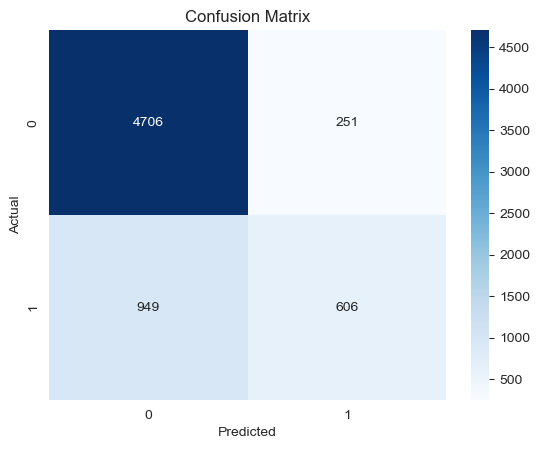

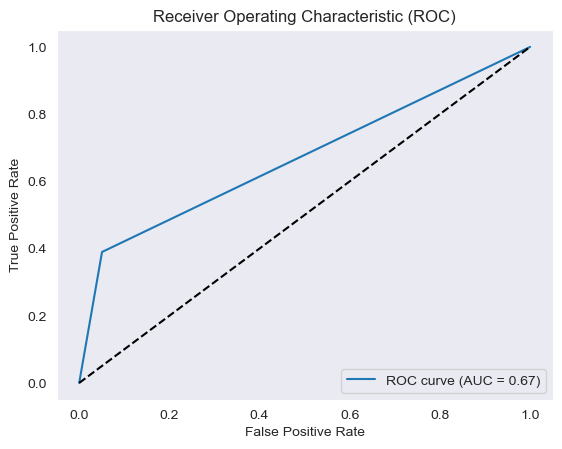

In [ ]:
#SVM CLASSIFIER

st = time.time()
    # Predict probabilities for the test data
y_pred = lin_svc_bag_clf.predict(X_test)
    # Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    # Calculate the AUC-ROC
auc_roc = auc(fpr, tpr)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
mcc = (tp * tn - fp * fn) / ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5
precision = tp / (tp + fp)
recall = tp / (tp + fn)
g_measure = (2 * precision * recall) / (precision + recall)
sp = time.time()
time_taken = sp -st
    # Print the AUC-ROC
print("AUC-ROC: %.2f%%" % (auc_roc * 100))

    # Print other evaluation metrics as percentages
print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred) * 100))
print("Recall/Sensitivity: %.2f%%" % (recall_score(y_test, y_pred) * 100))
print("F1 Score: %.2f%%" % (f1_score(y_test, y_pred) * 100))
print("Precision: %.2f%%" % (precision_score(y_test, y_pred) * 100))
print("Specificity: %.2f%%" % (specificity * 100))
print("G Measure: %.2f%%" % (g_measure * 100))
print("Matthew's Correlation Coefficient: %.2f%%" % (mcc * 100))
print("Totaltime of iteration is: %0.4f seconds" % (time_taken))

    # Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

    # Create a confusion matrix plot
labels = np.unique(y)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)

    # Set plot labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

    # Display the plot
plt.show()



    # Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random classifier)
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

AUC-ROC: 67.22%
Accuracy: 79.65%
Recall/Sensitivity: 43.41%
F1 Score: 50.47%
Precision: 60.27%
Specificity: 91.02%
G Measure: 50.47%
Matthew's Correlation Coefficient: 38.90%
Totaltime of iteration is: 5.2648 seconds


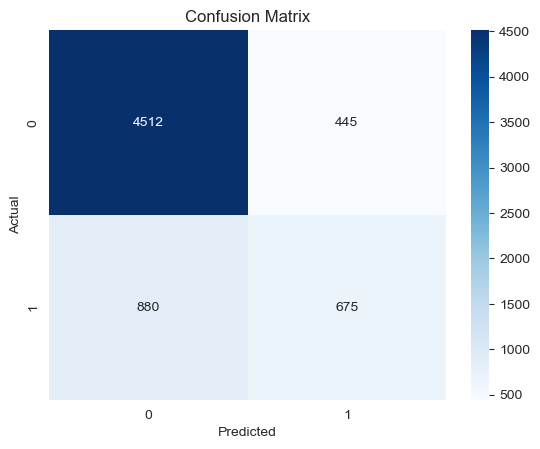

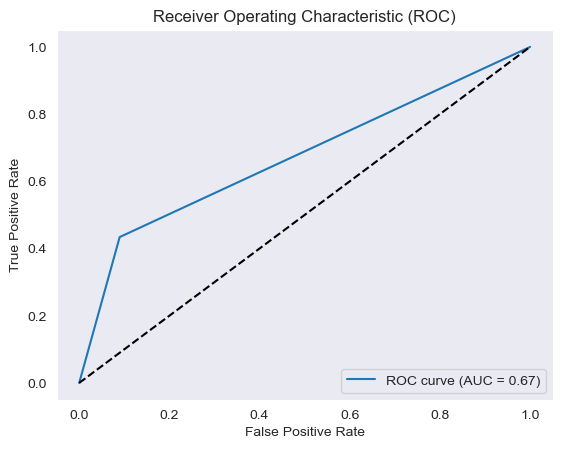

In [ ]:
#RF CLASSIFIER

st = time.time()
    # Predict probabilities for the test data
y_pred = rf_bag_clf.predict(X_test)
    # Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    # Calculate the AUC-ROC
auc_roc = auc(fpr, tpr)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
mcc = (tp * tn - fp * fn) / ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5
precision = tp / (tp + fp)
recall = tp / (tp + fn)
g_measure = (2 * precision * recall) / (precision + recall)
sp = time.time()
time_taken = sp -st
    # Print the AUC-ROC
print("AUC-ROC: %.2f%%" % (auc_roc * 100))

    # Print other evaluation metrics as percentages
print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred) * 100))
print("Recall/Sensitivity: %.2f%%" % (recall_score(y_test, y_pred) * 100))
print("F1 Score: %.2f%%" % (f1_score(y_test, y_pred) * 100))
print("Precision: %.2f%%" % (precision_score(y_test, y_pred) * 100))
print("Specificity: %.2f%%" % (specificity * 100))
print("G Measure: %.2f%%" % (g_measure * 100))
print("Matthew's Correlation Coefficient: %.2f%%" % (mcc * 100))
print("Totaltime of iteration is: %0.4f seconds" % (time_taken))

    # Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

    # Create a confusion matrix plot
labels = np.unique(y)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)

    # Set plot labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

    # Display the plot
plt.show()



    # Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random classifier)
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

SECTION Y: TOTAL TIME OF ITERATION

In [ ]:
stop_run = time.time()

total_time = stop_run - start_run

print("totaltime of iteration is: %0.1f seconds" % (total_time))

totaltime of iteration is: 14532.7 seconds


SECTION Z:
CONCLUSION: The best model is the ENSEMBLED SVM BAGGING. It got the highest accuracy score.

🧩 Key Features Influencing Income
Feature selection techniques helped identify the most influential factors:

✔ Age — Older individuals generally earn more.
✔ Education Rank — Higher education levels lead to higher income.
✔ Sex — Income disparities exist across genders.
✔ Hours Per Week — More working hours correlate with higher income.

These features significantly impacted income classification in the model.

🚀 Machine Learning Models Tested
To find the most accurate and robust model, I experimented with the following algorithms:

✅ Logistic Regression
✅ Decision Trees
✅ Random Forest
✅ K-Nearest Neighbors (KNN)
✅ Support Vector Machine (SVM)
✅ Gaussian Naïve Bayes (GNB)

📊 Model Performance (After Hyperparameter Tuning & Bagging)
Model Accuracy (%) Decision Tree 78.87% Logistic Regression 80.56% SVM (Best Model) 81.66% Gaussian NB 80.99% Random Forest 79.64% KNN 80.36%

🎯 SVM outperformed all models with an accuracy of 81.66% after applying bagging techniques.

🔬 Techniques Used
📌 Data Preprocessing: Categorical encoding, handling missing values
📌 Feature Selection: Forward selection, backward selection, correlation analysis
📌 Ensemble Learning: Bagging applied to improve model robustness

🌍 Real-World Applications
This project isn’t just an academic exercise — it has practical implications:

📊 HR & Recruitment — Identifying key factors that influence income can help organizations make fair compensation decisions.
💰 Finance & Credit Scoring — Banks can assess income potential when evaluating loan applications.
📈 Economic Policy & Research — Policymakers can use these insights to address income inequality and improve economic opportunities.

🚀 Future Research Directions
🔹 Deep Learning: Applying Recurrent Neural Networks (RNNs) or Transformers to improve prediction accuracy.
🔹 Model Stacking: Combining multiple models for better performance.
🔹 Expanded Feature Engineering: Exploring additional factors affecting income, such as job industry and economic conditions.